In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset
df = pd.read_csv("co2_emission.csv")

# Limpiar columnas
df.columns = [col.strip() for col in df.columns]
df.rename(columns={"Annual CO₂ emissions (tonnes )": "Annual_CO2_emissions"}, inplace=True)

# Lista de países del G8
g8_countries = [
    "Canada", "France", "Germany", "Italy",
    "Japan", "Russia", "United Kingdom", "United States"
]

# Años que representar
# selected_years = [1751, 1800, 1850, 1900, 1950, 2000, 2017]

selected_years = [1850, 1875, 1900, 1925, 1950, 2000, 2017]

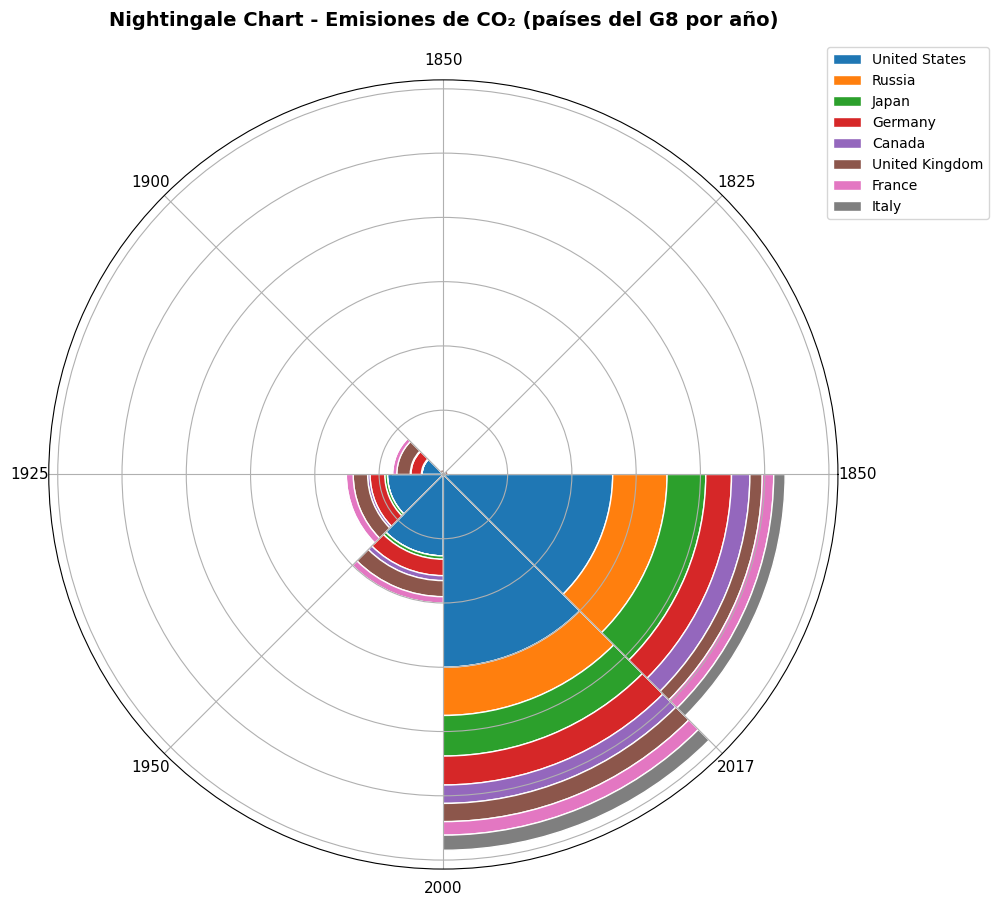

In [10]:
# Filtrar y pivotar datos para tener países como capas y años como barras
df_filtered = df[(df["Entity"].isin(g8_countries)) & (df["Year"].isin(selected_years))]
pivot_df = df_filtered.pivot(index="Entity", columns="Year", values="Annual_CO2_emissions").fillna(0)

# Asegurar el orden de países (por emisiones totales, opcional)
pivot_df = pivot_df.loc[pivot_df[2017].sort_values(ascending=False).index]

# Crear ángulos: uno por año
n = len(selected_years)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
angles += angles[:1]  # cerrar círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Colores para los países
colors = plt.cm.tab10.colors  # puedes cambiar a otra paleta

# Dibujar cada país como una capa apilada
bottom = np.zeros(n)
for i, country in enumerate(pivot_df.index):
    values = [pivot_df.at[country, year] for year in selected_years]
    values += values[:1]  # cerrar círculo
    bars = ax.bar(
        angles[:-1], values[:-1],
        width=2 * np.pi / n,
        bottom=bottom,
        color=colors[i % len(colors)],
        edgecolor='white',
        linewidth=1,
        align='edge',
        label=country
    )
    bottom += np.array(values[:-1])  # sumar para apilar

# Estética
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_years, fontsize=11)
ax.set_yticklabels([])
ax.set_title("Nightingale Chart - Emisiones de CO₂ (países del G8 por año)", fontsize=14, weight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.show()
